In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("data/india/modi_final.csv")
df2 = pd.read_csv("data/india/manmohan.csv")

In [3]:
df1 = df1[["date","article_text"]]

In [4]:
df2.rename(columns={"text":"article_text"},inplace=True)

In [5]:
df1.head()

,date,article_text
0,2022-02-18,"\nYour Highness, My Brother,\nA warm welcome ..."
1,2022-02-18,Namaskar!\nMaharashtra Governor Shri Bhagat Si...
2,2022-02-16,I am delighted to join you at the Twenty First...
3,2022-02-11,I congratulate President Macron on this import...
4,2022-02-07,"Hon’ble Mr. Speaker,\nI am here to reply on Mo..."


In [6]:
df2.head()

,date,article_text
0,May 17 2014,"My Fellow Citizens,I address you today for the..."
1,March 4 2014,“I am delighted to return to this beautiful ci...
2,March 1 2014,“I am very happy to participate in the Nationa...
3,February 26 2014,“Today marks a very important step forward tow...
4,February 21 2014,"""Madam Speaker,As we come to the end of the jo..."


In [7]:
def get_month(month):
    month = month.lower()
    if month == "january" or month == "jan":
        return "01"
    elif month == "february" or month == "feb":
        return "02"
    elif month == "march" or month == "mar":
        return "03"
    elif month == "april" or month == "apr":
        return "04"
    elif month == "may":
        return "05"
    elif month == "june" or month == "jun":
        return "06"
    elif month == "july" or month == "jul":
        return "07"
    elif month == "august" or month == "aug":
        return "08"
    elif month == "september" or month == "sep":
        return "09"
    elif month == "october" or month == "oct":
        return "10"
    elif month == "november" or month == "nov":
        return "11"
    elif month == "december" or month == "dec":
        return "12"
    else:
        return "01"


def parse_date(date):
    month = date.split(" ")[0]
    day = date.split(" ")[1]
    year = date.split(" ")[2]

    month = get_month(month)
    day = day.zfill(2)

    return f"{day}/{month}/{year}"

In [8]:
df2["date"] = df2["date"].apply(parse_date)

In [9]:
df2["date"] = pd.to_datetime(df2["date"], format="%d/%m/%Y")
df2["date"] = df2["date"].dt.strftime("%Y-%m-%d")

In [10]:
df2

,date,article_text
0,2014-05-17,"My Fellow Citizens,I address you today for the..."
1,2014-03-04,“I am delighted to return to this beautiful ci...
2,2014-03-01,“I am very happy to participate in the Nationa...
3,2014-02-26,“Today marks a very important step forward tow...
4,2014-02-21,"""Madam Speaker,As we come to the end of the jo..."
...,...,...
1396,2004-07-31,"Hindi VersionMr. Chairman,Excellencies,Ladies ..."
1397,2004-07-26,Hindi Version Distinguished Members of the CSI...
1398,2004-07-03,"Hindi Version ""It gives me great pleasure to b..."
1399,2004-06-29,"Hindi Version ""I welcome you all to this Confe..."


In [11]:
df1["PM"] = "Modi"
df2["PM"] = "Manmohan"

In [12]:
df = pd.concat([df1,df2],axis=0)

In [13]:
df

,date,article_text,PM
0,2022-02-18,"\nYour Highness, My Brother,\nA warm welcome ...",Modi
1,2022-02-18,Namaskar!\nMaharashtra Governor Shri Bhagat Si...,Modi
2,2022-02-16,I am delighted to join you at the Twenty First...,Modi
3,2022-02-11,I congratulate President Macron on this import...,Modi
4,2022-02-07,"Hon’ble Mr. Speaker,\nI am here to reply on Mo...",Modi
...,...,...,...
1396,2004-07-31,"Hindi VersionMr. Chairman,Excellencies,Ladies ...",Manmohan
1397,2004-07-26,Hindi Version Distinguished Members of the CSI...,Manmohan
1398,2004-07-03,"Hindi Version ""It gives me great pleasure to b...",Manmohan
1399,2004-06-29,"Hindi Version ""I welcome you all to this Confe...",Manmohan


In [14]:
import re
import string
from nltk.stem import LancasterStemmer
from nltk.probability import FreqDist

from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import seaborn as sns
%matplotlib inline

In [15]:
df["year"] = df["date"].apply(lambda x: int(x.split("-")[0]))
df1["year"] = df1["date"].apply(lambda x: int(x.split("-")[0]))
df2["year"] = df2["date"].apply(lambda x: int(x.split("-")[0]))

In [16]:
df

,date,article_text,PM,year
0,2022-02-18,"\nYour Highness, My Brother,\nA warm welcome ...",Modi,2022
1,2022-02-18,Namaskar!\nMaharashtra Governor Shri Bhagat Si...,Modi,2022
2,2022-02-16,I am delighted to join you at the Twenty First...,Modi,2022
3,2022-02-11,I congratulate President Macron on this import...,Modi,2022
4,2022-02-07,"Hon’ble Mr. Speaker,\nI am here to reply on Mo...",Modi,2022
...,...,...,...,...
1396,2004-07-31,"Hindi VersionMr. Chairman,Excellencies,Ladies ...",Manmohan,2004
1397,2004-07-26,Hindi Version Distinguished Members of the CSI...,Manmohan,2004
1398,2004-07-03,"Hindi Version ""It gives me great pleasure to b...",Manmohan,2004
1399,2004-06-29,"Hindi Version ""I welcome you all to this Confe...",Manmohan,2004


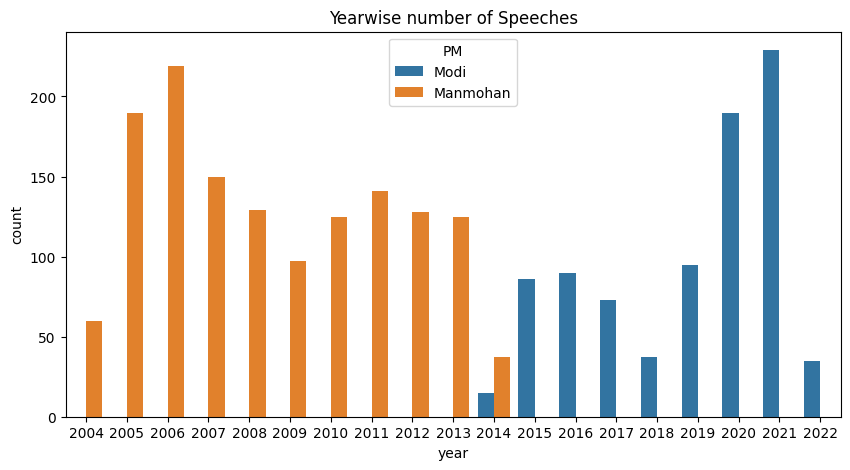

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x="year",hue="PM",data=df)
plt.title("Yearwise number of Speeches")
plt.savefig("india_dump/yearwise_speeches.png")